In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Kishore\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv('c:\Users\Kishore\Desktop\Datasets\perrin-freres-monthly-champagne-.csv')

In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.drop(106,axis=0,inplace=True)

In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [6]:
df.drop(105,axis=0,inplace=True)

In [7]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
df.columns=['Month','Sales per month' ]

In [9]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
df.isnull().any()

Month              False
Sales per month    False
dtype: bool

In [11]:
df['Month']=pd.to_datetime(df['Month'])

In [12]:
df.head()

,Month,Sales per month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.head()

,Sales per month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


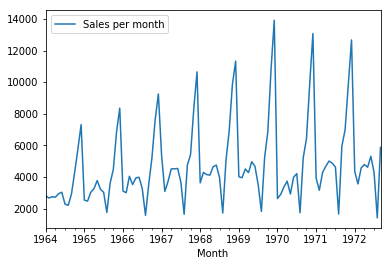

In [15]:
df.plot()

In [16]:
import statsmodels.api as sm


model=sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

In [17]:
results

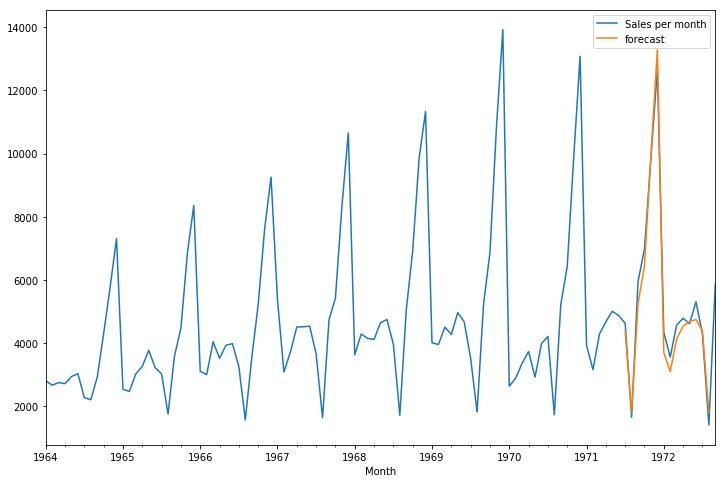

In [18]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [19]:
df

,Sales per month,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


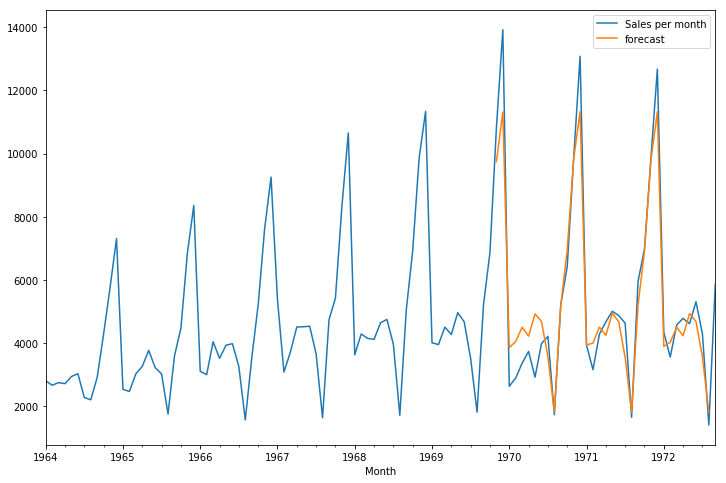

In [22]:
df['forecast']=results.predict(start=70,end=103,dynamic=True)
df[['Sales per month','forecast']].plot(figsize=(12,8))

In [23]:
df

,Sales per month,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [24]:
from pandas.tseries.offsets import DateOffset


In [25]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [26]:
from pandas.tseries.offsets import DateOffset


future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [27]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [31]:
type(future_dates)

list

In [32]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [33]:
future_datest_df

,Sales per month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [34]:
future_df=pd.concat([df,future_datest_df]) # default axis = 0

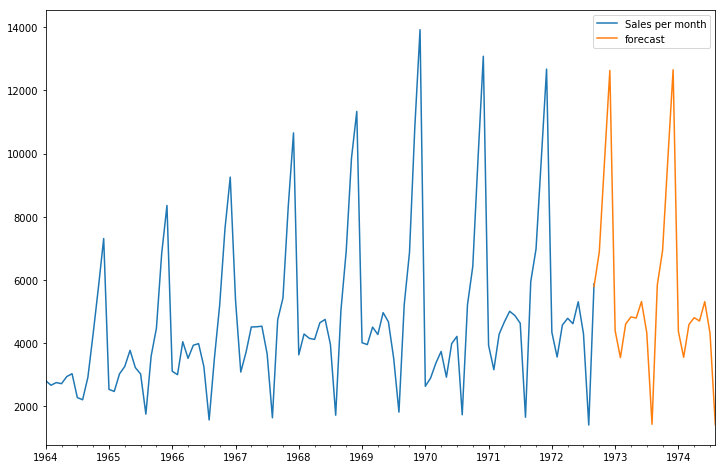

In [35]:
future_df['forecast'] = results.predict(start = 104, end = 160, dynamic= True)  
future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8)) 

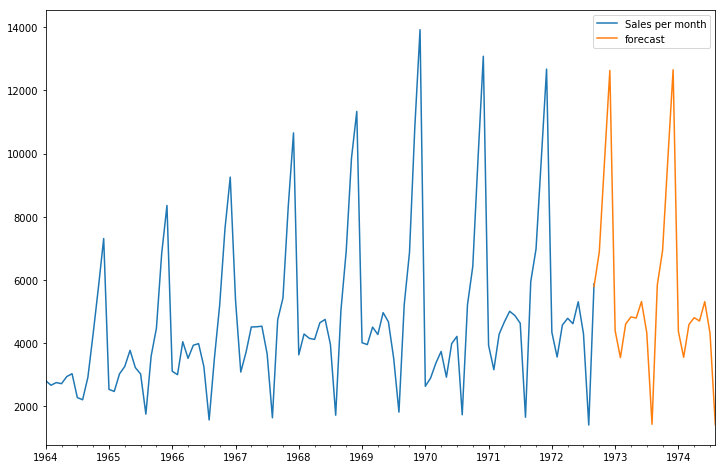

In [40]:
future_df['forecast'] = results.predict(start = 104, end = 200, dynamic= True)  
future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8)) 

In [41]:
future_df

,Sales per month,forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN
1964-10-01,4301.0,NaN
